# A supervised machine learning project to prevent customer churn

## Goal
1. visualize and identify the factors/features that contributes to the churn of customers
2. Construct and train a machine learning model to predict the possibility of churns and help custumer service target the factors that may lead to churn and prevent customer churn, reduce loss of profit

This project features a classification problem, where we need to predict whether a given bank customer is likely to close their bank account or not.

The EDA notebook shows explorative data analysis of the dataset. The dataset has both categorinal features and numerical features, and the target to be predicted is a binary label. Correlations between the features and the target as well as between the features themselves are analyzed in the EDA.

The pipeline is constructed with the following components:

#1 Download: The dataset is stored oneline. We initiate the pipeline by downloading it from the url and store it in a volume that our pipeline can have access to (in this case, I stored it in my Google Cloud Storage bucket).

#2 Train test split: We split the dataset into training and test datasets (8:2). The test dataset serves as a holdout set and will be used to evaluate our model performance in the end.

#3 Data preprocessing: Since the dataset has both categorical and numerical features. Before feeding them to a model, we first one-hot encode the categorical features and standardize the numerical features to keep them on the same scale. The OneHotEncoder and StandardScaler are fit to the training dataset, and then saved so that we can use them to transform the test dataset later on.

#4 Model training: We train 3 base line models on the preprocessed training data - Logistic Regression, K Nearest Neighbors, and Random Forests. We perform a cross validation with each model and use Grid Search to find the optimal hyperparameters for the model. We can visualized the selected evaluation metrics for each model

#5 Make predictions on the test dataset: Finally, we use one of the three models that gives the best performance to predict the test dataset, and output evaluation metrics. But before making the predictions, don't forget to first preprocess the test dataset using the previously saved OneHotEncoder and StandardScaler.

The pipeline can be compiled with the command python make_pipeline.py. A notebook version is also included in the repository.

## Dataset

#### The dataset is from kaggle There are 14 attributes in the dataset. The information of the dataset is shown as follow:
RowNumber — the record (row) number and has no effect on the output.

CustomerId — contains random values and has no effect on customer leaving the bank.

Surname — the surname of a customer has no impact on their decision to leave the bank.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. Geography — a customer’s location can affect their decision to leave the bank.
Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

## Step by Step

### 1. Data exploration and visualization 

### 2. Data Preprocessing 

### 3. Model Selection and Evaluation

### 4. Model Performance Improve thru Feature Selection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

sns.set_style('whitegrid')

In [4]:
import zipfile as zf
files = zf.ZipFile("archive.zip", 'r')  # this is the zip file you uploaded on Jupyter Notebook and plan to extract the files within it
files.extractall('Customer Churn Prediction')   # this is the folder name which you plan to store all the extracted data files
files.close()

In [5]:
churn_df = pd.read_csv('Churn_Modelling.csv')

display(churn_df.head(10))
churn_df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


(10000, 14)

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check the number of unique classes of each attributes 
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# Separate the target and the other features to analyze the features only
y = churn_df['Exited']
# churn_df = churn_df.drop(columns=['Exited'])
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
y.unique()

array([1, 0], dtype=int64)

In [10]:
# Check number of NaN or NULL
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
discrete_features = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']
churn_df[['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Tenure']]

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Tenure
0,France,Female,1,1,1,2
1,Spain,Female,1,0,1,1
2,France,Female,3,1,0,8
3,France,Female,2,0,0,1
4,Spain,Female,1,1,1,2
...,...,...,...,...,...,...
9995,France,Male,2,1,0,5
9996,France,Male,1,1,1,10
9997,France,Female,1,0,1,7
9998,Germany,Male,2,1,0,3


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

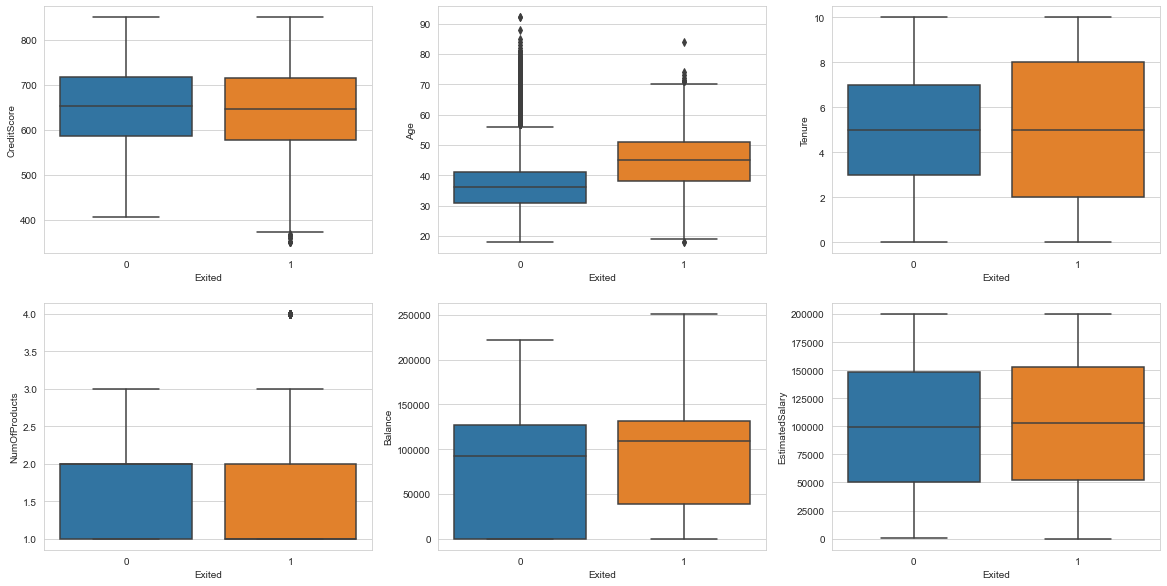

In [12]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2])

<AxesSubplot:xlabel='Exited', ylabel='count'>

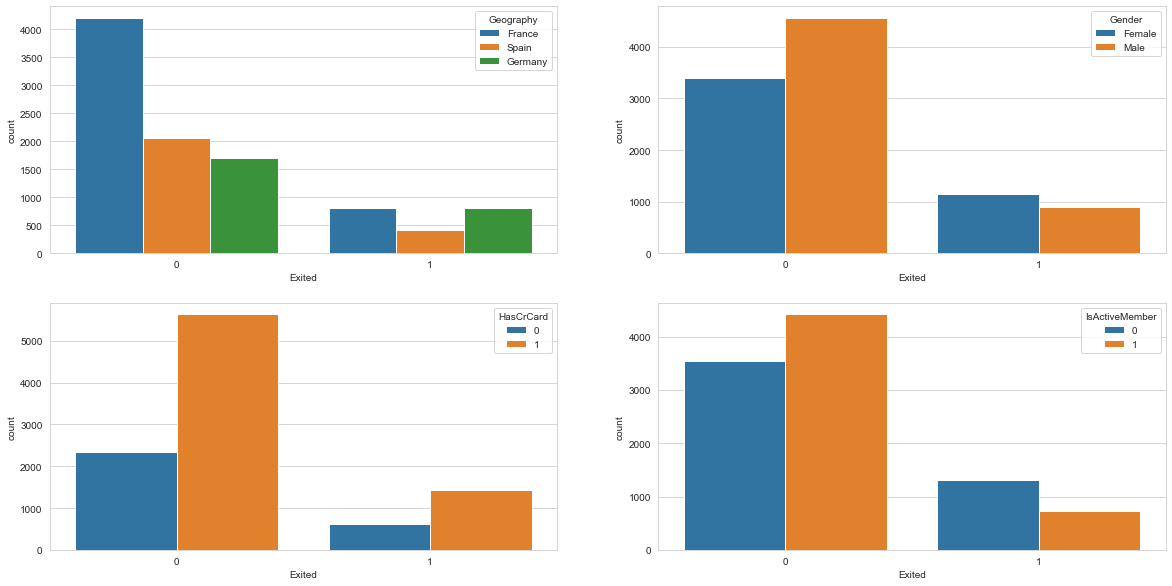

In [13]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

<AxesSubplot:>

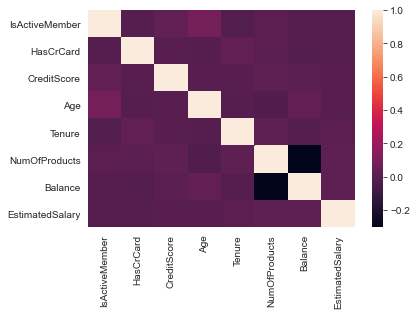

In [14]:
correlation = churn_df[['IsActiveMember','HasCrCard','CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()
sns.heatmap(correlation)

In [15]:
correlation

,IsActiveMember,HasCrCard,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
IsActiveMember,1.000000,-0.011866,0.025651,0.085472,-0.028362,0.009612,-0.010084,-0.011421
HasCrCard,-0.011866,1.000000,-0.005458,-0.011721,0.022583,0.003183,-0.014858,-0.009933
CreditScore,0.025651,-0.005458,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,0.085472,-0.011721,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,-0.028362,0.022583,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.009612,0.003183,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,-0.010084,-0.014858,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.011421,-0.009933,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


In [16]:
drop_list = ['RowNumber','CustomerId','Surname','Exited']
X= churn_df.drop(columns=drop_list)

In [17]:
X['Gender'].loc[X['Gender']=='Female'] = 0
X['Gender'].loc[X['Gender']=='Male'] = 1

C:\Users\frede\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [19]:
one_hot_features = ['Geography']
X=pd.get_dummies(X,columns=one_hot_features)

In [20]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [21]:
# Split dataset into training set and testset 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit
# Using stratification method to stratify the dataset based on classes in target feature y
# and then split test set, training set. Finally, shuffle two datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 12 features
test data has 2500 observation with 12 features


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## If using Min-Max scaler
# sm = MinMaxScaler()
# X_train = sm.fit_transform(X_train,max=1.0,min=0.0)
# X_test = ss.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold, cross_val_score

rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
model_ls = [rf_clf, lr_clf, knn_clf,svc_clf]
model_names = ['Random Forest','logistic Reg', 'KNN','SVC']

In [24]:
for i in range(len(model_ls)):
  score = cross_val_score(model_ls[i], X_train, y_train, cv=5)
  print("Model: ",model_names[i], "Score: ", score)

Model:  Random Forest Score:  [0.876      0.862      0.85466667 0.85733333 0.86266667]
Model:  logistic Reg Score:  [0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model:  KNN Score:  [0.82533333 0.836      0.814      0.824      0.832     ]
Model:  SVC Score:  [0.87133333 0.85066667 0.846      0.84733333 0.856     ]


In [25]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.001, 0.01, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [27]:
print_grid_search_metrics(Grid_LR)
best_LR_model = Grid_LR.best_estimator_

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [28]:
# Tune KNN model
parameters = {
    'n_neighbors':[1,3,5,7,9,12,15,20]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 20]})

In [29]:
print_grid_search_metrics(Grid_KNN)
best_KNN_model = Grid_KNN.best_estimator_

Best score: 0.8329333333333333
Best parameters set:
n_neighbors:15


In [30]:
parameters = {
    'n_estimators' : [40,60,80,100,120,150]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80, 100, 120, 150]})

In [31]:
print_grid_search_metrics(Grid_RF)
best_RF_model = Grid_RF.best_estimator_

Best score: 0.8658666666666666
Best parameters set:
n_estimators:100


In [32]:
# SVC
parameters = {
    'C' : [0.001,0.01, 1, 3 ,5],
    'kernel':['rbf','poly'],
    'degree': [2,3,4],  # degree of the polynominal kernel
    "probability":[True]
}
Grid_SVC = GridSearchCV(SVC(),parameters, cv=5)
Grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 3, 5], 'degree': [2, 3, 4],
                         'kernel': ['rbf', 'poly'], 'probability': [True]})

In [34]:
print_grid_search_metrics(Grid_SVC)
best_SVC_model = Grid_SVC.best_estimator_

Best score: 0.8585333333333333
Best parameters set:
C:3
degree:2
kernel:rbf
probability:True


In [35]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
model_names = ['logistic Reg','KNN','Random Forest','SVC']
confusion_matrices =[]
matrices = [ confusion_matrix(y_test,best_LR_model.predict(X_test)),
 confusion_matrix(y_test,best_KNN_model.predict(X_test)),
 confusion_matrix(y_test,best_RF_model.predict(X_test)),
 confusion_matrix(y_test,best_SVC_model.predict(X_test))]

for i in range(len(matrices)):
  confusion_matrices.append((model_names[i], matrices[i]))



confusion_matrices

[('logistic Reg',
  array([[1921,   70],
         [ 410,   99]], dtype=int64)),
 ('KNN',
  array([[1920,   71],
         [ 352,  157]], dtype=int64)),
 ('Random Forest',
  array([[1920,   71],
         [ 282,  227]], dtype=int64)),
 ('SVC',
  array([[1930,   61],
         [ 296,  213]], dtype=int64))]

In [36]:
# Compute and print accuracy, precision, recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()


def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

draw_confusion_matrices(confusion_matrices)

logistic Reg
Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289

KNN
Accuracy is: 0.8308
precision is: 0.6885964912280702
recall is: 0.30844793713163066

Random Forest
Accuracy is: 0.8588
precision is: 0.761744966442953
recall is: 0.44597249508840864

SVC
Accuracy is: 0.8572
precision is: 0.7773722627737226
recall is: 0.41846758349705304



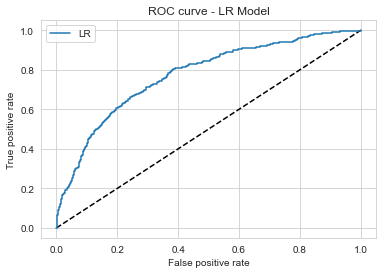

AUC of LR 0.7722314264879581


In [37]:
from sklearn.metrics import roc_curve, plot_roc_curve, auc
def plot_roc(fpr,tpr, threshold, model):
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label=model)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve - {0} Model'.format(model))
  plt.legend(loc='best')
  plt.show()
## We can either use plot roc function from sklearn or the self-defined function
#plot_roc_curve(best_LR_model,X_test, y_test,)

fpr_LR, tpr_LR, threshold = roc_curve(y_test, best_LR_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_LR, tpr_LR, threshold, 'LR')
print("AUC of LR",auc(fpr_LR,tpr_LR))

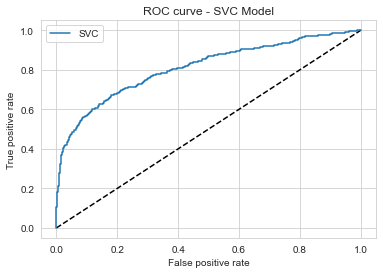

AUC of SVC 0.8101022380673739


In [38]:
fpr_SVC, tpr_SVC, threshold_SVC = roc_curve(y_test, best_SVC_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_SVC, tpr_SVC, threshold_SVC, 'SVC')
print("AUC of SVC",auc(fpr_SVC,tpr_SVC))

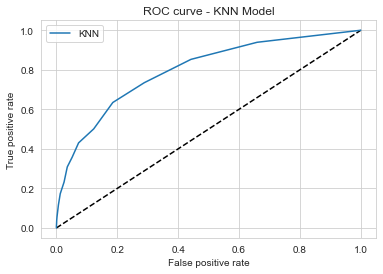

AUC of KNN 0.7966078196678767


In [39]:
fpr_KNN, tpr_KNN, threshold_KNN = roc_curve(y_test, best_KNN_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_KNN, tpr_KNN, threshold_KNN, 'KNN')
print("AUC of KNN",auc(fpr_KNN,tpr_KNN))

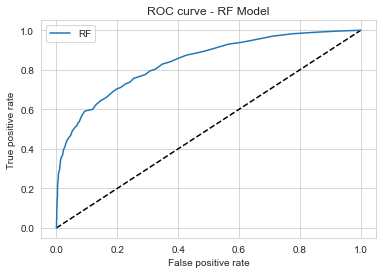

AUC of RF 0.8389738104377361


In [40]:
fpr_RF, tpr_RF, threshold_RF = roc_curve(y_test, best_RF_model.predict_proba(X_test)[:,1])
## Using self-define ROC Curve plot function
plot_roc(fpr_RF, tpr_RF, threshold_RF, 'RF')
print("AUC of RF",auc(fpr_RF,tpr_RF))

In [41]:
# Compute and print accuracy, precision, recall

    
def draw_performance_tb(confusion_matrix_ls):
    def cal_evaluation(classifier, cm):
      tn = cm[0][0]
      fp = cm[0][1]
      fn = cm[1][0]
      tp = cm[1][1]
      accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
      precision = tp / (tp + fp + 0.0)
      recall = tp / (tp + fn + 0.0)
      return accuracy, precision, recall

    class_names = ['Not','Churn']
    model_dic = {}
    eval_df = pd.DataFrame(columns=['model','Accuracy','Precision','Recall'])
    for cm in confusion_matrix_ls:
        classifier, cm = cm[0], cm[1]
        accuracy, precision, recall = cal_evaluation(classifier, cm)
        model_df = pd.DataFrame(data={'model':classifier,'Accuracy':accuracy,'Precision':precision,'Recall':recall},index=[0])
        # print(model_df)
        eval_df=eval_df.append(model_df ,ignore_index= True) 
        
    return eval_df

draw_performance_tb(confusion_matrices)

,model,Accuracy,Precision,Recall
0,logistic Reg,0.8080,0.585799,0.194499
1,KNN,0.8308,0.688596,0.308448
2,Random Forest,0.8588,0.761745,0.445972
3,SVC,0.8572,0.777372,0.418468


In [42]:
forest = best_RF_model
# forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2397
EstimatedSalary : 0.1431
CreditScore : 0.1409
NumOfProducts : 0.1385
Balance : 0.1384
Tenure : 0.0825
IsActiveMember : 0.0373
Geography_Germany : 0.0217
Gender : 0.0191
HasCrCard : 0.0184
Geography_France : 0.0113
Geography_Spain : 0.0091


In [43]:
np.random.seed()
LRmodel_l2 = best_LR_model

LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.7631
IsActiveMember : -0.5169
Gender : -0.2529
Geography_Germany : 0.2371
Balance : 0.1383
Geography_France : -0.1338
Geography_Spain : -0.0826
CreditScore : -0.0636
NumOfProducts : -0.056
Tenure : -0.0371
HasCrCard : -0.0279
EstimatedSalary : 0.0247


In [44]:
from sklearn.inspection import permutation_importance
## Impute feature importance
 
LR_model = best_LR_model
importances = permutation_importance(LR_model, X, y, n_repeats=10,random_state=0)
importances = importances.importances_mean
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Logistic Regression Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without featu

Feature importance ranking by Logistic Regression Model:
Balance : 0.0004
EstimatedSalary : 0.0002
Gender : 0.0001
Tenure : 0.0001
IsActiveMember : 0.0
Geography_Germany : 0.0
Geography_Spain : 0.0
Geography_France : 0.0
HasCrCard : 0.0
NumOfProducts : 0.0
CreditScore : -0.0
Age : -0.0001


C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\frede\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without featu

In [45]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters =12, init='k-means++',random_state=2020).fit(X_train)

In [46]:
train_clusters = km.predict(X_train)
test_clusters = km.predict(X_test)
train_clusters.shape,test_clusters.shape, X_train.shape, X_test.shape

((7500,), (2500,), (7500, 12), (2500, 12))

In [47]:
df_clusters = pd.DataFrame(data={'cluster':train_clusters})

In [48]:
# To see if the trained clusters are good clusters that have almost equal amount of data points
for c in set(df_clusters['cluster']):
  print('Center:',c,' Count:',len(df_clusters[df_clusters['cluster'] == c]))

Center: 0  Count: 338
Center: 1  Count: 684
Center: 2  Count: 995
Center: 3  Count: 572
Center: 4  Count: 633
Center: 5  Count: 535
Center: 6  Count: 648
Center: 7  Count: 696
Center: 8  Count: 548
Center: 9  Count: 582
Center: 10  Count: 639
Center: 11  Count: 630


In [49]:
# One-hot Encoding to convert numerical label to 0,1 binary representation
train_clusters = pd.get_dummies(train_clusters)
test_clusters = pd.get_dummies(test_clusters)

In [51]:

X_train_cluster = np.concatenate([X_train, train_clusters], axis=1)
X_test_cluster = np.concatenate([X_test, test_clusters], axis=1)

In [52]:
# Random Forest with Cluster feature
parameters = {
    'n_estimators' : [40,60,80,100,120,140]
}
Grid_RF_cluster = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80, 100, 120, 140]})

In [53]:
print_grid_search_metrics(Grid_RF_cluster)
best_RF_cluster_model = Grid_RF_cluster.best_estimator_

Best score: 0.8620000000000001
Best parameters set:
n_estimators:140


In [54]:
new_matrices = [("RF with Cluster",confusion_matrix(y_test,best_RF_cluster_model.predict(X_test_cluster)))]
from sklearn.metrics import recall_score, precision_score,accuracy_score
print("recall:",recall_score(y_test,best_RF_cluster_model.predict(X_test_cluster)),
'Precisoin:',precision_score(y_test,best_RF_cluster_model.predict(X_test_cluster)),
'Accuracy:',accuracy_score(y_test,best_RF_cluster_model.predict(X_test_cluster)))
# draw_performance_tb(new_matrices)
# new_matrices

recall: 0.4400785854616896 Precisoin: 0.764505119453925 Accuracy: 0.8584


In [55]:
# SVC
parameters = {
    'C' : [0.001,1, 3 ,5, 10],
    'kernel':['rbf'],
    # 'degree': [2,3,4],  # degree of the polynominal kernel
    "probability":[True]
}
Grid_SVC_cluster = GridSearchCV(SVC(),parameters, cv=5)
Grid_SVC_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 1, 3, 5, 10], 'kernel': ['rbf'],
                         'probability': [True]})

In [56]:
print_grid_search_metrics(Grid_SVC_cluster)
best_SVC_cluster_model = Grid_SVC_cluster.best_estimator_

Best score: 0.8584000000000002
Best parameters set:
C:5
kernel:rbf
probability:True


In [57]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.001, 0.01, 1, 5, 10)
}
Grid_LR_cluster = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.001, 0.01, 1, 5, 10), 'penalty': ('l1', 'l2')})

In [58]:
print_grid_search_metrics(Grid_LR_cluster)
best_LR_cluster_model = Grid_LR_cluster.best_estimator_

Best score: 0.8178666666666666
Best parameters set:
C:1
penalty:l1


In [59]:
parameters = {
    'n_neighbors':[1,3,5,7,9,12,15,20]
}
Grid_KNN_cluster = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN_cluster.fit(X_train_cluster, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 20]})

In [60]:
print_grid_search_metrics(Grid_KNN_cluster)
best_KNN_cluster_model = Grid_KNN_cluster.best_estimator_

Best score: 0.8322666666666667
Best parameters set:
n_neighbors:15


In [61]:
model_names = ['logistic Reg with Cluster','KNN with Cluster','Random Forest with Cluster','SVC with Cluster']
confusion_matrices_cluster =[]
matrices_cluster = [ confusion_matrix(y_test,best_LR_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_KNN_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_RF_cluster_model.predict(X_test_cluster)),
 confusion_matrix(y_test,best_SVC_cluster_model.predict(X_test_cluster))]

for i in range(len(matrices_cluster)):
  confusion_matrices_cluster.append((model_names[i], matrices_cluster[i]))

In [62]:
model_names = ['logistic Reg with Cluster','KNN with Cluster','Random Forest with Cluster','SVC with Cluster']
model_ls = [best_LR_cluster_model,best_KNN_cluster_model,best_RF_cluster_model,best_SVC_cluster_model]
for i, model in enumerate(model_ls):
  print(model_names[i],': ',
      "recall:",recall_score(y_test,model.predict(X_test_cluster)),'\t',
  'Precisoin:',precision_score(y_test,model.predict(X_test_cluster)),'\t',
  'Accuracy:',accuracy_score(y_test,model.predict(X_test_cluster)))

logistic Reg with Cluster :  recall: 0.22986247544204322 	 Precisoin: 0.6256684491978609 	 Accuracy: 0.8152
KNN with Cluster :  recall: 0.29862475442043224 	 Precisoin: 0.6940639269406392 	 Accuracy: 0.8304
Random Forest with Cluster :  recall: 0.4400785854616896 	 Precisoin: 0.764505119453925 	 Accuracy: 0.8584
SVC with Cluster :  recall: 0.43418467583497056 	 Precisoin: 0.7647058823529411 	 Accuracy: 0.8576


In [63]:
model_names = ['logistic Reg','KNN','Random Forest','SVC']
model_ls = [best_LR_model,best_KNN_model,best_RF_model,best_SVC_model]
for i, model in enumerate(model_ls):
  print(model_names[i],': ',
      "recall:",recall_score(y_test,model.predict(X_test)),'\t',
  'Precisoin:',precision_score(y_test,model.predict(X_test)),'\t',
  'Accuracy:',accuracy_score(y_test,model.predict(X_test)))

logistic Reg :  recall: 0.1944990176817289 	 Precisoin: 0.5857988165680473 	 Accuracy: 0.808
KNN :  recall: 0.30844793713163066 	 Precisoin: 0.6885964912280702 	 Accuracy: 0.8308
Random Forest :  recall: 0.44597249508840864 	 Precisoin: 0.761744966442953 	 Accuracy: 0.8588
SVC :  recall: 0.41846758349705304 	 Precisoin: 0.7773722627737226 	 Accuracy: 0.8572


In [64]:
draw_performance_tb(confusion_matrices_cluster)

,model,Accuracy,Precision,Recall
0,logistic Reg with Cluster,0.8152,0.625668,0.229862
1,KNN with Cluster,0.8304,0.694064,0.298625
2,Random Forest with Cluster,0.8584,0.764505,0.440079
3,SVC with Cluster,0.8576,0.764706,0.434185


In [65]:
draw_performance_tb(confusion_matrices)

,model,Accuracy,Precision,Recall
0,logistic Reg,0.8080,0.585799,0.194499
1,KNN,0.8308,0.688596,0.308448
2,Random Forest,0.8588,0.761745,0.445972
3,SVC,0.8572,0.777372,0.418468


## Summary: 
After adding the feature of k-mean cluster, accuracy of Logistic Regression are improved by 2%. Performances of SVC classifier are also improved slightly. In KNN, there is tradeoff between precision and recall. Accuracy, Recall and Precision of Random Forest are decreased slightly.

In these models, SVC and Random Forest are suggested to solve this Customer Churn Prediction problem. 